# Distributions

Interesting sources: 
- https://www.edx.org/course/probability-the-science-of-uncertainty-and-data

In [1]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

<img src="https://wherethewindsblow.com/wp-content/uploads/2015/07/JUMBO-Six-sided-white-dice.jpg" style="width: 300px;"/>

In [6]:
minValue = 1
maxValue = 6
numberOfSamples = 1000000 # Increase number to show that it converges to a uniform distribution

In [7]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )

In [8]:
results

0         5
1         3
2         5
3         6
4         6
         ..
999995    2
999996    2
999997    4
999998    2
999999    1
Length: 1000000, dtype: int32

<AxesSubplot:>

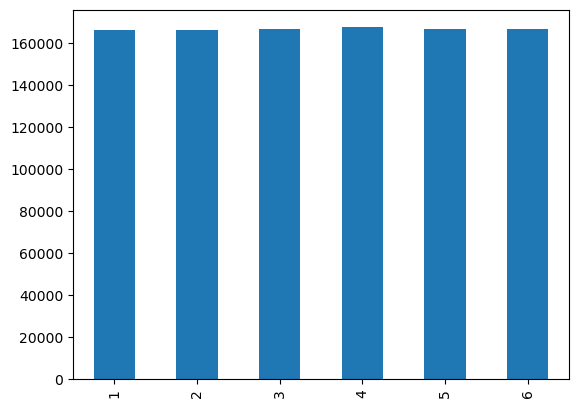

## Normal distribution

### Sampling from the average length a full-grown citizen in the Netherlands.

In [14]:
averageLength = 174.25
stdLength = 8
numberOfPeopleToSample = 3 # Play with these values to show the impact on the histogram

In [15]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )

In [16]:
randomLengths

0    184.730641
1    170.685731
2    169.399979
dtype: float64

<AxesSubplot:ylabel='Frequency'>

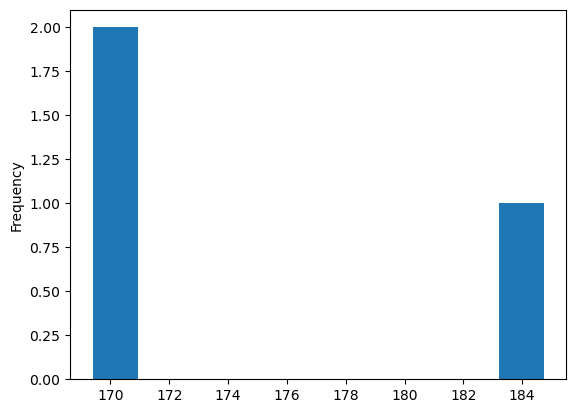

In [17]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

In [21]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000 # 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) )
    sampleMeans.append(randomLengths.mean())

In [22]:
sampleMeans

[173.65347719955585,
 173.91485006166147,
 172.60300286722705,
 174.88790446466513,
 175.66796447298097,
 174.23293335562695,
 174.26306554868495,
 174.20250368104342,
 175.2067329980703,
 176.31493877125206,
 173.63076956536096,
 174.85848228567986,
 174.35654315851505,
 174.37253199514507,
 173.30840125559075,
 174.57713531564355,
 174.08435625951907,
 173.75425234419023,
 173.74341997367264,
 173.92669522570458,
 175.65636488391672,
 173.80084737139728,
 175.68634785480012,
 175.12543180940582,
 176.47626461199073,
 175.34864406855402,
 173.72153705727698,
 174.35459088463125,
 174.48486893589964,
 173.97354047592424,
 174.8355888612788,
 173.6576330894741,
 174.3250862504843,
 175.74193644776892,
 175.34309268579509,
 172.8585808805682,
 174.78751835526816,
 174.75160440913038,
 173.91182743839184,
 173.9736456612696,
 175.04278943536255,
 174.9981364825097,
 172.83551949957769,
 173.4782740353936,
 173.78149818016283,
 173.45314598156048,
 173.5712343513939,
 174.63915499214795,
 

<AxesSubplot:ylabel='Frequency'>

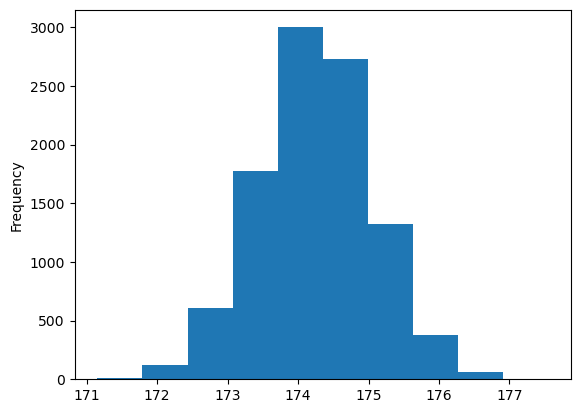

In [23]:
pd.Series(sampleMeans).plot(kind='hist', bins = 10)

In [24]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<AxesSubplot:ylabel='Frequency'>

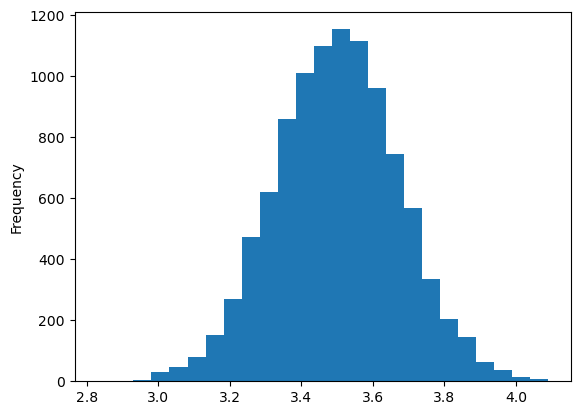

In [25]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

![](https://getcalc.com/formula/statistics/mean-confidence-interval-infinite-population.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [26]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(172.18714670273752, 175.29312005483072)

In [27]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(3.580134319279885, 4.2998656807201145)

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)